In [21]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
import IPython.display as ipd

In [22]:
def RLC_filter_fc(fc, t, input_signal): # Parámetros: resistencia, capacitancia, tiempo y señal de entrada

    R_v = 1000
    L_v = 0.1
    C_v = ((1/(2*np.pi*fc))**2) / L_v

    
    # Define symbolic variables
    s = sym.symbols('s', complex=True)
    R, C, L = sym.symbols('R C L', positive=True)

    # Transfer function H(s) = 1 / (1 + sRC)
    H = 1/(L*C*s**2 + R*C*s + 1)

    num, den = sym.fraction(H)

    num_coeffs = sym.Poly(num, s).all_coeffs()
    den_coeffs = sym.Poly(den, s).all_coeffs() #Poly() Genera un polinomio a partir de una expresión, lo usamos para acceder a all_coeffs(). Genera una lista de listas con los coeficientes

    zero_coeff = [float(coeff.subs({R: R_v, C: C_v, L: L_v})) for coeff in num_coeffs] # Otra manera de hacerlo más rápido. Estudiar los for dentro de arrays [for idx in array]
    polo_coeff = [float(coeff.subs({R: R_v, C: C_v, L: L_v})) for coeff in den_coeffs]

    # Crear el sistema LTI
    system = sig.lti(zero_coeff, polo_coeff)

    # Simular la respuesta del sistema a la señal de entrada
    return sig.lsim(system, input_signal, t)


In [23]:
# Archivo de audio y parámetros
path = 'sounds/nature.mp3'
ti = 0  # Tiempo inicial en segundos
tf = 5  # Tiempo final en segundos

# Leer archivo de audio
data, samplerate = sf.read(path)

# Calcular índices de muestra
start_sample = int(ti * samplerate)
end_sample = int(tf * samplerate)

# Extraer segmento de audio
segment = data[start_sample:end_sample]

# Promediar canales si el audio es estéreo
x = np.mean(segment, axis=1) if segment.ndim > 1 else segment

# Generar el vector de tiempo
t = np.linspace(ti, tf, len(x), endpoint=False)

# Reproducir el audio
ipd.Audio(x, rate=samplerate)

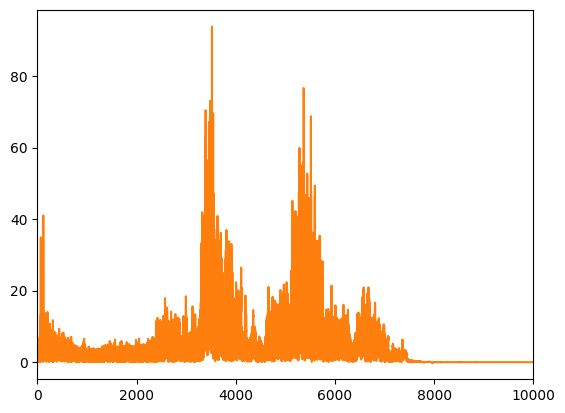

In [24]:
xw = np.fft.rfft(x)
freq = np.fft.rfftfreq(len(x), 1/samplerate)

plt.plot(t, x)
plt.plot(freq, np.abs(xw))
plt.xlim(0, 10000)
plt.show()